# Eigenface: Parameter Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

from eigenface import EigenFacekNN, EigenFaceSVC # my implementations of eigenface
import utils # my utils module

plt.style.use('seaborn') # set the style for matplotlib

In [2]:
# load data
import sklearn.datasets
from sklearn.model_selection import train_test_split


lfw_people = sklearn.datasets.fetch_lfw_people(min_faces_per_person=70, resize=0.4)

n_samples, h, w = lfw_people.images.shape
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

X = lfw_people.data
n_features = X.shape[1]

y = lfw_people.target


print("Total dataset size:")
print("n_samples: ",  n_samples)
print("n_features: ", n_features)
print("n_classes: ", n_classes)


# #############################################################################
# Split into a training set and a test set using a stratified k fold

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Total dataset size:
n_samples:  1288
n_features:  1850
n_classes:  7


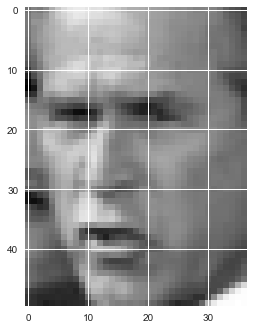

In [3]:
# show a random image sample
sample_img = lfw_people.images[np.random.choice(range(n_samples))]
plt.imshow(sample_img, cmap='gray')

## Eigenface with kNN Classifier

In [4]:
fixed_params = {'k': 5}
param_name = 'n_components'
param_values = [1, 2, 3, 5, 10, 20, 50, 100, 150, 200]
train_scores, test_scores = utils.test_parameter(EigenFacekNN, param_values, param_name, fixed_params, X_train, y_train, X_test, y_test)

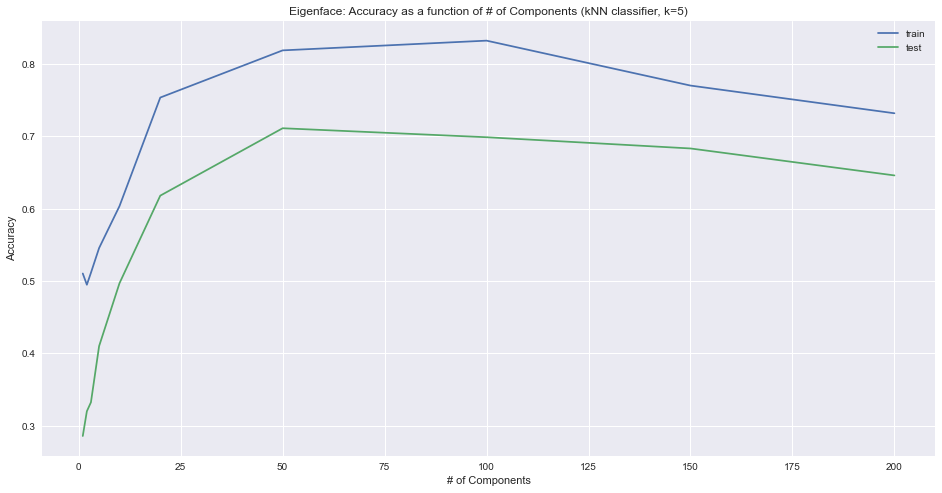

In [5]:
fig, ax = plt.subplots(figsize=(16, 8));
ax.plot(param_values, train_scores, label='train');
ax.plot(param_values, test_scores, label='test');
ax.set_xlabel('# of Components');
ax.set_ylabel('Accuracy');
ax.legend();
ax.set_title('Eigenface: Accuracy as a function of # of Components (kNN classifier, k=5)');
fig.savefig('figs/eigface_kNN_ncomponents.eps')
fig.savefig('figs/eigface_kNN_ncomponents.png')

## Eigenface with SVC Classifier

In [6]:
fixed_params = {'kernel': 'rbf', 'C': 1.0, 'gamma': 'auto'}
param_name = 'n_components'
param_values = [1, 2, 3, 5, 10, 20, 50, 100, 150, 200]

train_scores, test_scores = utils.test_parameter(EigenFaceSVC, param_values, param_name, fixed_params, X_train, y_train, X_test, y_test)

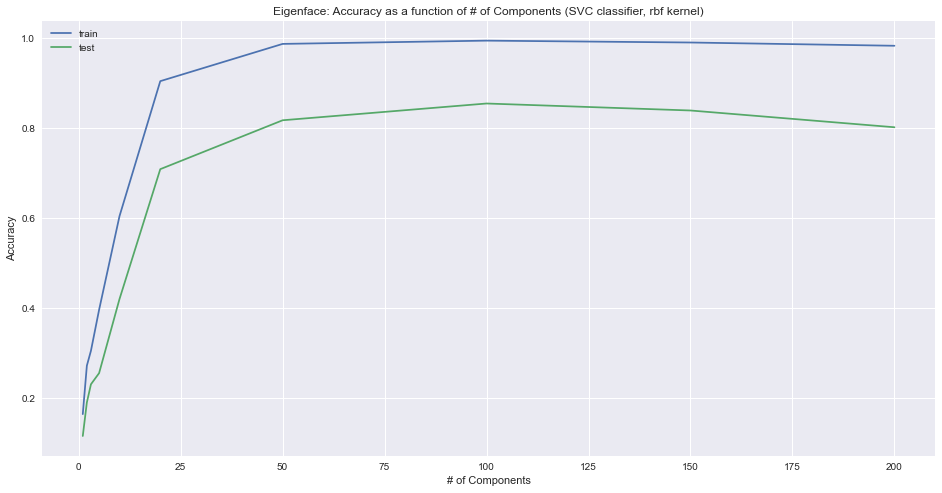

In [7]:
fig, ax = plt.subplots(figsize=(16, 8));
ax.plot(param_values, train_scores, label='train');
ax.plot(param_values, test_scores, label='test');
ax.set_xlabel('# of Components');
ax.set_ylabel('Accuracy');
ax.legend();
ax.set_title('Eigenface: Accuracy as a function of # of Components (SVC classifier, rbf kernel)');
fig.savefig('figs/eigface_SVC_ncomponents.eps')
fig.savefig('figs/eigface_SVC_ncomponents.png')